In [2]:
import pandas as pd

# Load the dataset
file_path = 'respiratory_disease.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,is_respiratory,respiratory_diagnosis
0,2019-01-04,West,Vikas Puri,310710,Dr. Ravikant,1.367039e+09,10:06:51,1,28.0,['influenza'],True,True
1,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367939e+09,11:18:14,0,52.0,['acute nasopharyngitis'],True,True
2,2017-04-26,West,Uttam Nagar,320720,Pramod,1.121171e+09,10:41:09,1,3.0,['acute upper respiratory infections'],True,True
3,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367938e+09,12:42:33,0,6.0,['acute nasopharyngitis'],True,True
4,2019-06-28,West,Uttam Nagar,320720,Pramod,1.367938e+09,12:21:19,0,26.0,['bronchitis'],True,True


1. **Duplicate entries** (multiple visits on the same day for the same medongoid): 1,628 records.
2. **Age discrepancies** (age gap greater than 2 for the same medongoid): 5 records.
3. **Gender discrepancies** (different genders for the same medongoid): 2 records.
4. **Clean data** (without anomalies): 3,34,169 records

In [3]:
# Step 1: Identify duplicates for the same `medongoid` on the same day
duplicate_entries = data[data.duplicated(subset=["medongoid", "date"], keep=False)]

# Step 2: Check for age discrepancies (age gap > 2 for the same `medongoid`)
age_discrepancy = data.groupby("medongoid")["age"].agg(['min', 'max'])
age_discrepancy = age_discrepancy[age_discrepancy['max'] - age_discrepancy['min'] > 2]
age_discrepancy_ids = age_discrepancy.index

# Step 3: Check for gender discrepancies (different genders for the same `medongoid`)
gender_discrepancy = data.groupby("medongoid")["gender"].nunique()
gender_discrepancy = gender_discrepancy[gender_discrepancy > 1]
gender_discrepancy_ids = gender_discrepancy.index

# Step 4: Filter out clean data
anomalous_ids = set(duplicate_entries["medongoid"]).union(age_discrepancy_ids).union(gender_discrepancy_ids)
clean_data = data[~data["medongoid"].isin(anomalous_ids)]

# Count anomalies
duplicate_count = len(duplicate_entries)
age_discrepancy_count = len(age_discrepancy_ids)
gender_discrepancy_count = len(gender_discrepancy_ids)
clean_count = len(clean_data)

# Summary
duplicate_count, age_discrepancy_count, gender_discrepancy_count, clean_count


(1628, 5, 2, 334169)

In [4]:
# Remove anomalies from the dataset
filtered_data = data[~data["medongoid"].isin(anomalous_ids)]

# Save clean data and anomalies to separate files
clean_data_path = 'clean_data.csv'
anomalies_path = 'anomalies_data.csv'

# Save clean data
filtered_data.to_csv(clean_data_path, index=False)

# Save anomalies (duplicates + age + gender issues)
anomalies_data = data[data["medongoid"].isin(anomalous_ids)]
anomalies_data.to_csv(anomalies_path, index=False)

clean_data_path, anomalies_path


('clean_data.csv', 'anomalies_data.csv')

# **EDA on the Cleaned Dataset**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean data
clean_data = pd.read_csv(clean_data_path)

# Convert 'date' to datetime for easier analysis
clean_data['date'] = pd.to_datetime(clean_data['date'])

# Extract additional time-based features
clean_data['year'] = clean_data['date'].dt.year
clean_data['month'] = clean_data['date'].dt.month
clean_data['day'] = clean_data['date'].dt.day
clean_data['quarter'] = clean_data['date'].dt.quarter

# Overview: Summary statistics for numerical variables
summary_stats = clean_data[['age', 'gender']].describe()

# Gender distribution
gender_dist = clean_data['gender'].value_counts()

# Top cities and districts
top_cities = clean_data['city'].value_counts().head(10)
top_districts = clean_data['district'].value_counts()

# Diagnosis frequency
diagnosis_counts = clean_data['diagnosis'].value_counts().head(10)

# Seasonal trend: Monthly case counts
monthly_trend = clean_data.groupby('month').size()

# Yearly case trends
yearly_trend = clean_data.groupby('year').size()

# Results preparation
summary_stats, gender_dist, top_cities, top_districts, diagnosis_counts, monthly_trend, yearly_trend


(                 age         gender
 count  334169.000000  334169.000000
 mean       26.050474       0.519031
 std        21.212712       0.499638
 min         0.000000       0.000000
 25%         7.000000       0.000000
 50%        22.000000       1.000000
 75%        40.000000       1.000000
 max       100.000000       1.000000,
 gender
 1    173444
 0    160725
 Name: count, dtype: int64,
 city
 Nangloi           94918
 Vikas Puri        89208
 Uttam Nagar       66995
 Rajouri Garden    23952
 Madipur           22812
 Vikas Nagar       21306
 Shakurbasti       10497
 MUNDKA             4481
 Name: count, dtype: int64,
 district
 West    334169
 Name: count, dtype: int64,
 diagnosis
 ['acute upper respiratory infections']    118234
 ['acute nasopharyngitis']                  87643
 ['influenza']                              33868
 ['bronchitis']                              9744
 ['asthma']                                  8804
 ['allergic rhinitis']                       7377
 ['up

# **Visual Representations**


1.   City Wise Case distribution
2.   Diagnosis Cluster vs Case Count
3.   Monthly Trend of Cases\



<ipython-input-5-2945b8ea2c6f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='viridis')


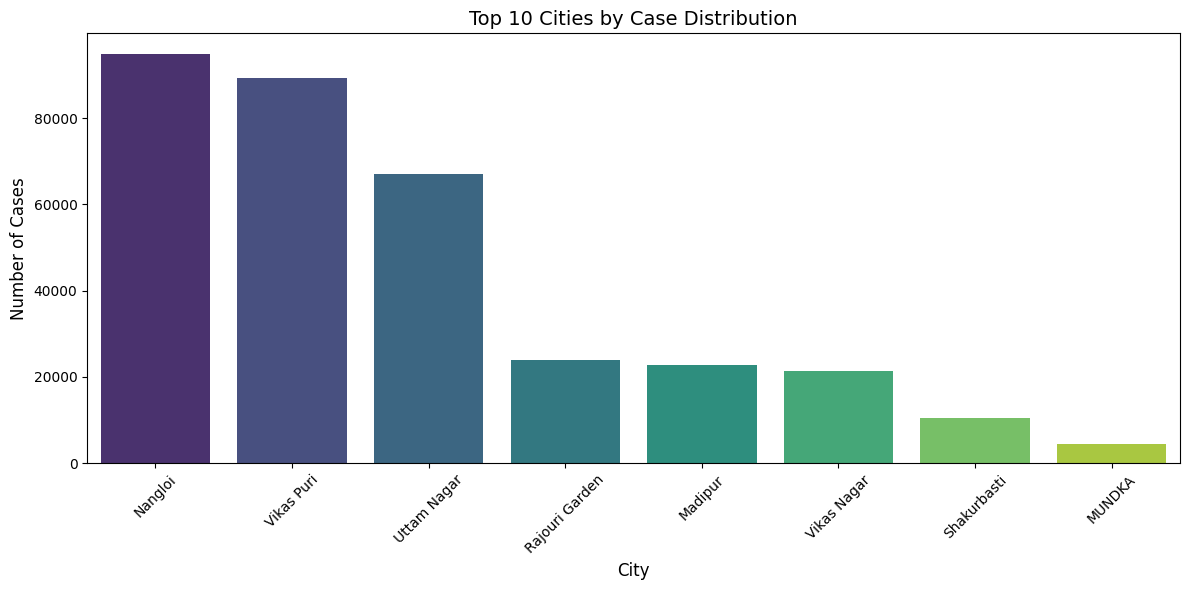

<ipython-input-5-2945b8ea2c6f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=diagnosis_distribution.index, x=diagnosis_distribution.values, palette='rocket')


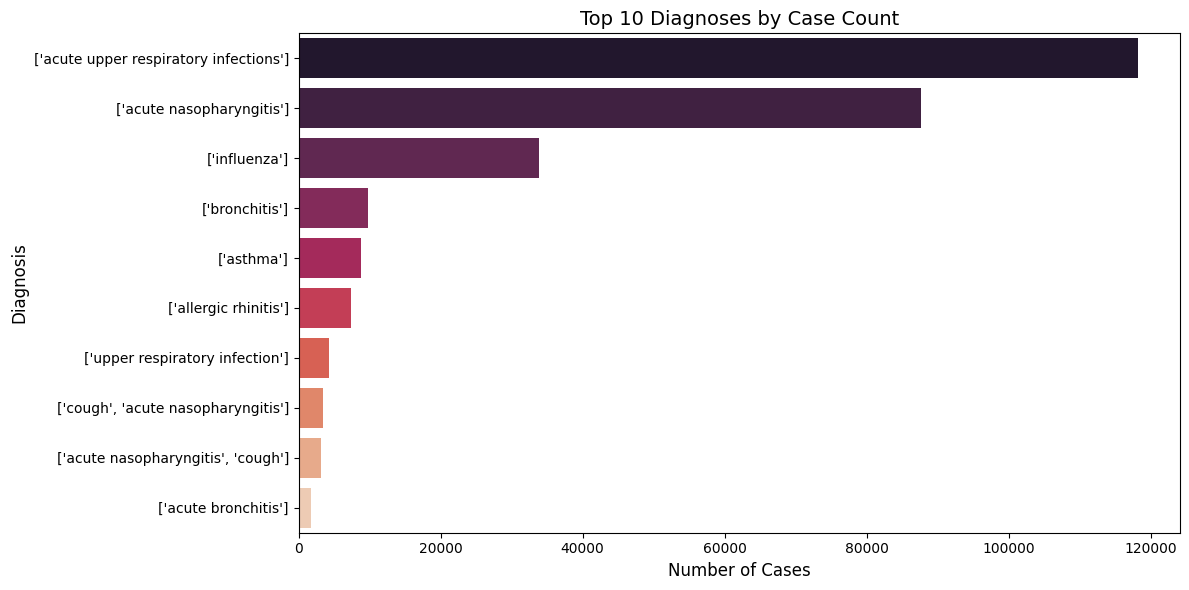

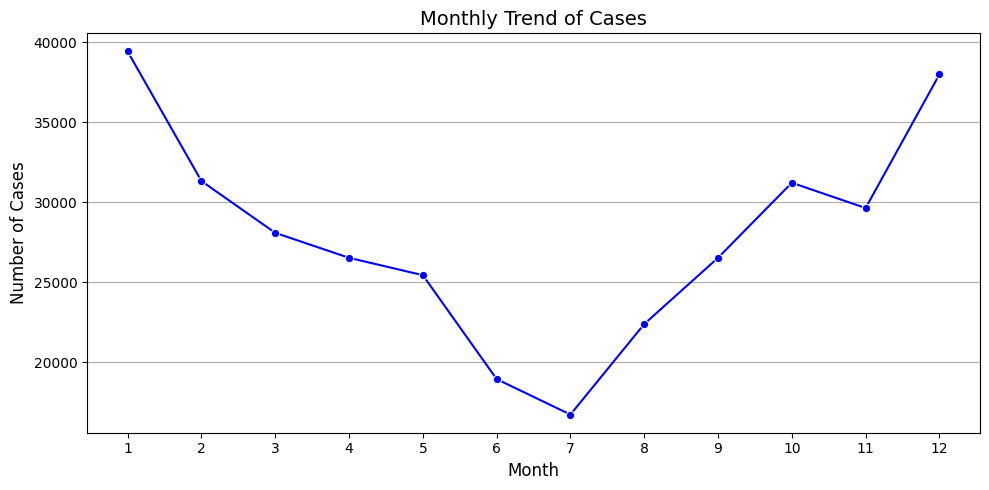

In [ ]:
# Prepare data for visualizations

# City-wise case distribution
city_distribution = clean_data['city'].value_counts().head(10)

# Diagnosis vs count of cases
diagnosis_distribution = clean_data['diagnosis'].value_counts().head(10)

# Month-wise trend of cases
month_trend = clean_data.groupby('month').size()

# Plot 1: City-wise case distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='viridis')
plt.title("Top 10 Cities by Case Distribution", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Diagnosis vs count of cases
plt.figure(figsize=(12, 6))
sns.barplot(y=diagnosis_distribution.index, x=diagnosis_distribution.values, palette='rocket')
plt.title("Top 10 Diagnoses by Case Count", fontsize=14)
plt.xlabel("Number of Cases", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)
plt.tight_layout()
plt.show()

# Plot 3: Month-wise trend of cases
plt.figure(figsize=(10, 5))
sns.lineplot(x=month_trend.index, y=month_trend.values, marker='o', color='blue')
plt.title("Monthly Trend of Cases", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Individual disease Vs Cases

<ipython-input-6-308bd67494ec>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diagnosis_df.head(10), x='Count', y='Diagnosis', palette='coolwarm')


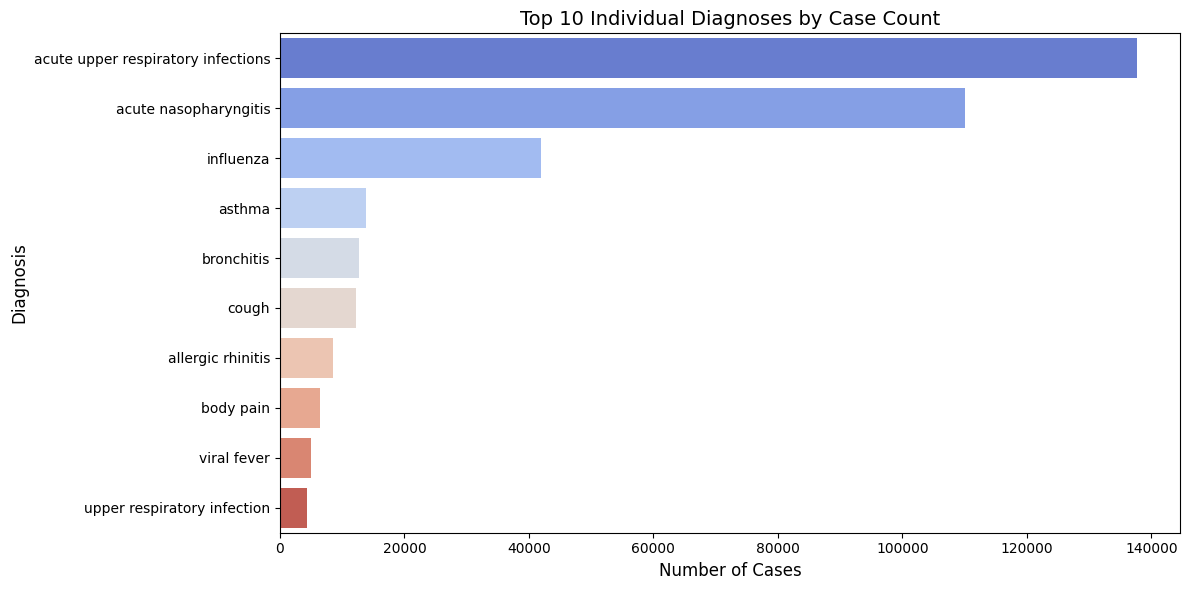

In [ ]:
# Split diagnosis into individual entries and count each diagnosis separately
from collections import Counter

# Cleaning and flattening the diagnosis column (assumes it's in list-like string format)
clean_data['diagnosis_cleaned'] = clean_data['diagnosis'].str.strip("[]").str.replace("'", "").str.split(", ")
all_diagnoses = clean_data['diagnosis_cleaned'].explode()

# Count the frequency of individual diagnoses
diagnosis_counts = Counter(all_diagnoses)
diagnosis_df = pd.DataFrame(diagnosis_counts.items(), columns=['Diagnosis', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top 10 individual diagnoses
plt.figure(figsize=(12, 6))
sns.barplot(data=diagnosis_df.head(10), x='Count', y='Diagnosis', palette='coolwarm')
plt.title("Top 10 Individual Diagnoses by Case Count", fontsize=14)
plt.xlabel("Number of Cases", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\vidhi\AppData\Local\Temp\ipykernel_844\657432250.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['diagnosis_cleaned'] = clean_data['diagnosis'].str.strip("[]").str.replace("'", "").str.split(", ")
C:\Users\vidhi\AppData\Local\Temp\ipykernel_844\657432250.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=diagnosis_df.head(10), x='Count', y='Diagnosis', palette='coolwarm')


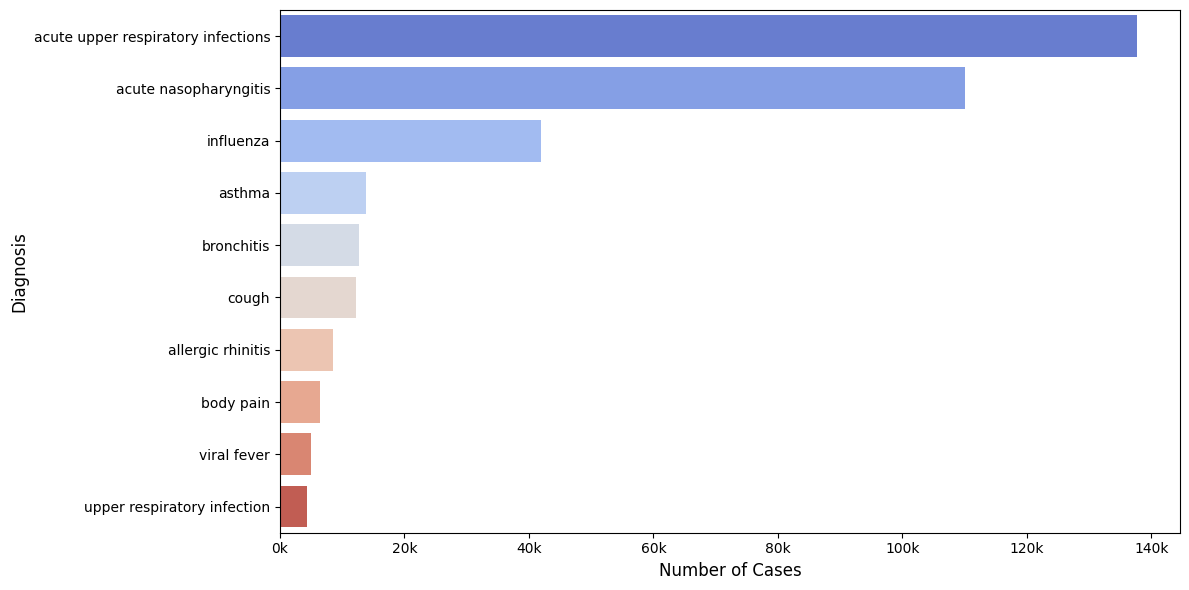

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

# Cleaning and flattening the diagnosis column
clean_data['diagnosis_cleaned'] = clean_data['diagnosis'].str.strip("[]").str.replace("'", "").str.split(", ")
all_diagnoses = clean_data['diagnosis_cleaned'].explode()

# Count the frequency of individual diagnoses
diagnosis_counts = Counter(all_diagnoses)
diagnosis_df = pd.DataFrame(diagnosis_counts.items(), columns=['Diagnosis', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top 10 individual diagnoses
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=diagnosis_df.head(10), x='Count', y='Diagnosis', palette='coolwarm')


plt.xlabel("Number of Cases", fontsize=12)
plt.ylabel("Diagnosis", fontsize=12)

# Format x-axis labels to 2k, 3k, 4k, etc.
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout()
plt.show()


ValueError: Unknown format code 'd' for object of type 'float'

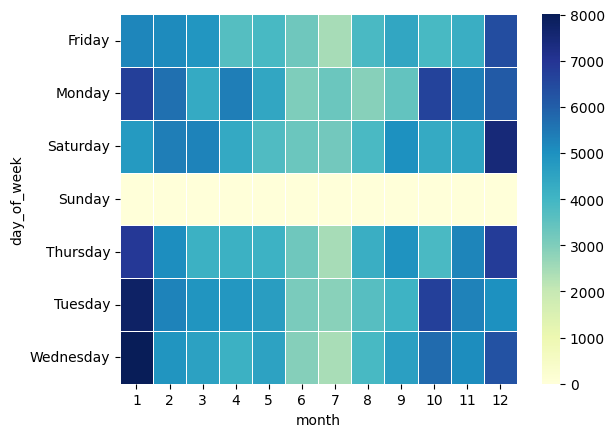

In [ ]:
# Extract day of the week and year information
clean_data['day_of_week'] = clean_data['date'].dt.day_name()
clean_data['month'] = clean_data['date'].dt.month
clean_data['year'] = clean_data['date'].dt.year

# Daily Trends (Day of Week vs Month)
daily_trends = clean_data.groupby(['day_of_week', 'month']).size().unstack().fillna(0)
sns.heatmap(daily_trends, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Daily Trends: Density of Cases by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()

# Monthly Trends (Year vs Month)
monthly_trends = clean_data.groupby(['year', 'month']).size().unstack().fillna(0)
sns.heatmap(monthly_trends, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title("Monthly Trends: Density of Cases by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

# Yearly Trends (Year vs Day of Week)
yearly_trends = clean_data.groupby(['year', 'day_of_week']).size().unstack().fillna(0)
sns.heatmap(yearly_trends, annot=True, fmt="d", cmap="viridis", linewidths=0.5)
plt.title("Yearly Trends: Density of Cases by Year and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Year")
plt.show()


# Age Group Distribution

<ipython-input-11-a6f027e884c5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=clean_data, palette='viridis')


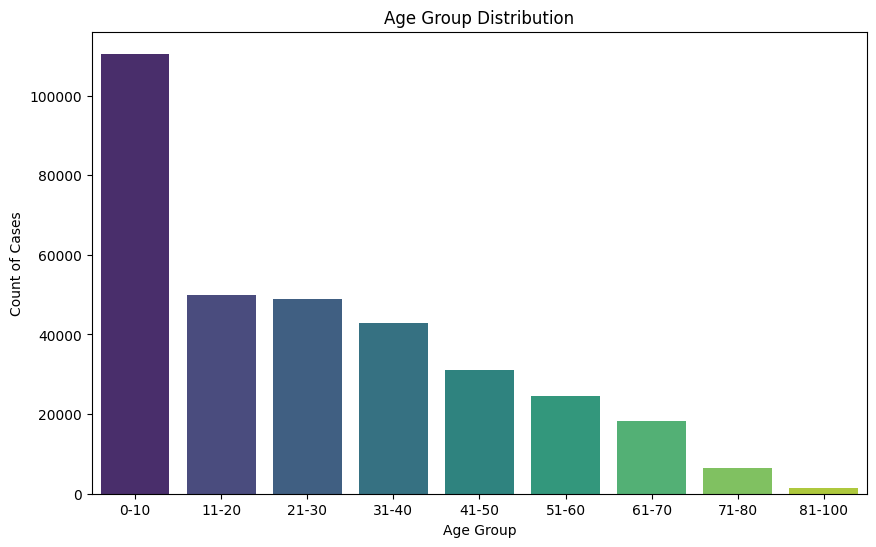

In [ ]:
# Create age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
clean_data['age_group'] = pd.cut(clean_data['age'], bins=bins, labels=labels)

# Plot age group distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=clean_data, palette='viridis')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count of Cases")
plt.show()


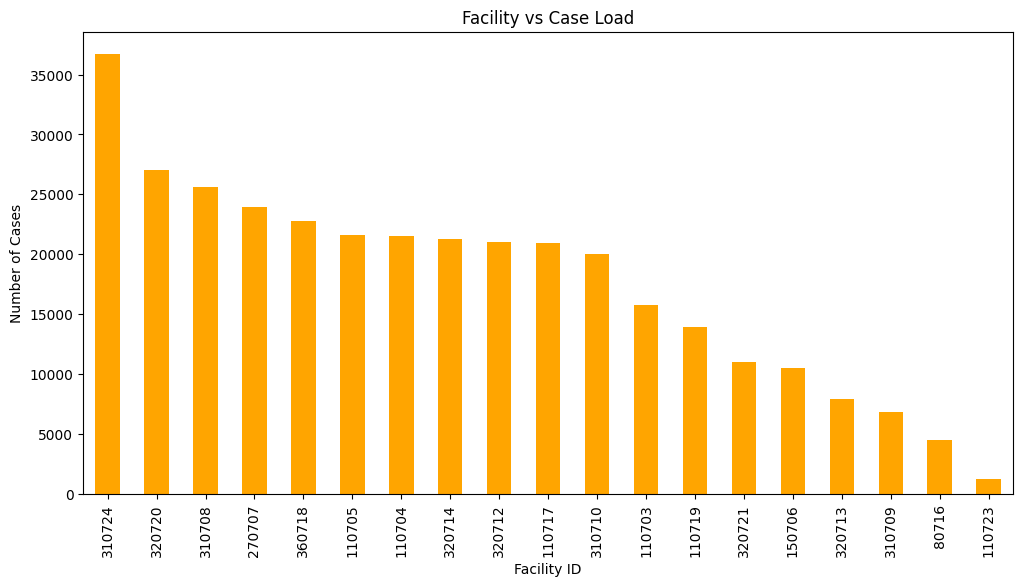

In [14]:
# Facility vs case load
facility_case_load = clean_data.groupby('facilityid').size().sort_values(ascending=False)
facility_case_load.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title("Facility vs Case Load")
plt.xlabel("Facility ID")
plt.ylabel("Number of Cases")
plt.show()


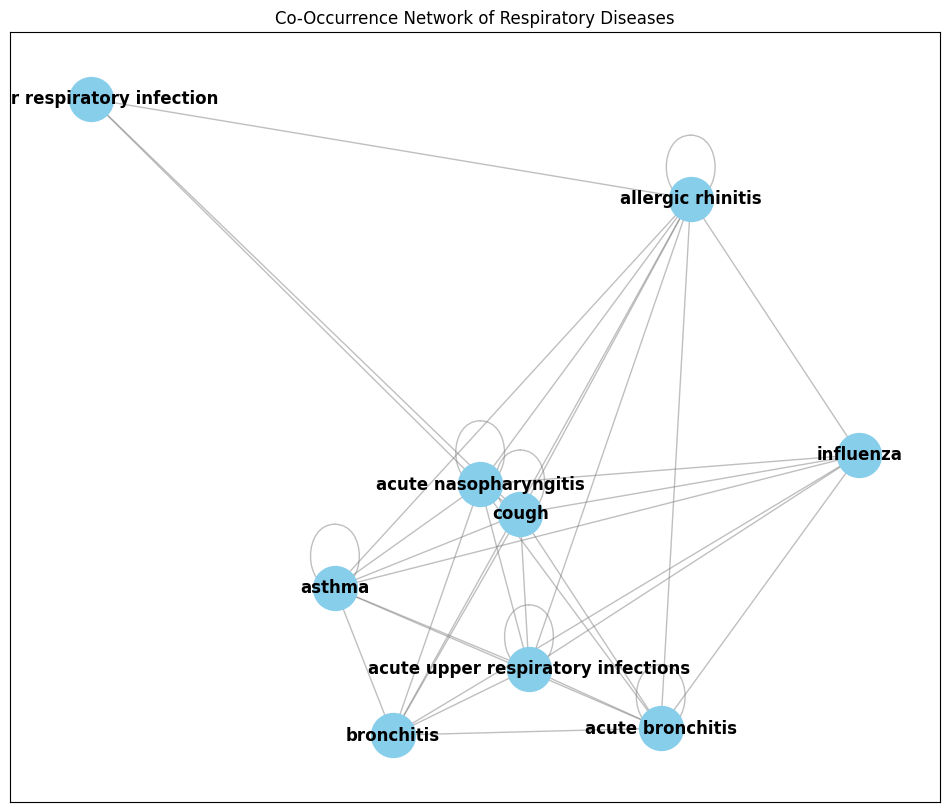

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# List of respiratory diseases
respiratory_diseases = [
    'acute upper respiratory infections',
    'acute nasopharyngitis',
    'influenza',
    'bronchitis',
    'asthma',
    'allergic rhinitis',
    'upper respiratory infection',
    'cough',
    'acute bronchitis'
]

# Function to filter diagnoses to only include respiratory diseases
def filter_respiratory_diseases(diagnosis_list):
    return [d for d in diagnosis_list if d in respiratory_diseases]

# Ensure that the diagnosis column is processed as a list
clean_data['diagnosis'] = clean_data['diagnosis'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Apply the filter function to each diagnosis list
clean_data['filtered_diagnoses'] = clean_data['diagnosis'].apply(filter_respiratory_diseases)

# Remove rows where no relevant respiratory diagnoses are found
filtered_data = clean_data[clean_data['filtered_diagnoses'].apply(lambda x: len(x) > 0)]

# Create a counter to track co-occurrence between diseases
co_occurrence_counter = Counter()

# Iterate through the filtered diagnoses and count co-occurrences
for diagnoses in filtered_data['filtered_diagnoses']:
    # Check if there is more than one diagnosis (to co-occur)
    if len(diagnoses) > 1:
        for i in range(len(diagnoses)):
            for j in range(i + 1, len(diagnoses)):
                # Sort the pair to avoid duplication and add to the counter
                co_occurrence_counter[tuple(sorted([diagnoses[i], diagnoses[j]]))] += 1

# Create the graph
G = nx.Graph()

# Add edges to the graph with weight based on co-occurrence count
for (disease1, disease2), weight in co_occurrence_counter.items():
    G.add_edge(disease1, disease2, weight=weight)

# Check if the graph has nodes
if len(G.nodes) == 0:
    print("Warning: No co-occurrence detected. Try reducing the filtering criteria.")

# Plot the co-occurrence network
plt.figure(figsize=(12, 10))
if len(G.nodes) > 0:
    pos = nx.spring_layout(G, k=0.5, iterations=20)  # Layout for better node spacing
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    plt.title("Co-Occurrence Network of Respiratory Diseases")
    plt.show()
else:
    print("No network to plot due to lack of co-occurrence.")
